In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing,linear_model,svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
X = pd.read_csv('../Desktop/machine-learning-ex4/ex4/X.csv', sep=",", header=None)
Y = pd.read_csv('../Desktop/machine-learning-ex4/ex4/Y.csv', sep=",", header=None)
Theta1 = pd.read_csv('../Desktop/machine-learning-ex4/ex4/Theta1.csv', sep=",", header=None)
Theta2 = pd.read_csv('../Desktop/machine-learning-ex4/ex4/Theta2.csv', sep=",", header=None)
Theta1.shape,Theta2.shape,X.shape,Y.shape

((25, 401), (10, 26), (5000, 400), (5000, 1))

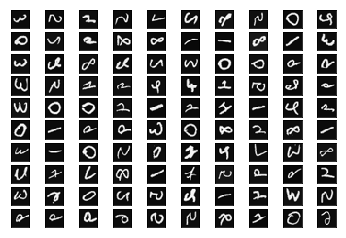

In [4]:
sample = np.array(X.sample(frac=0.5))
# sample = preprocessing.scale(sample)
sample.shape
for i in range(100):
    intensitymatrix = np.array(sample[i]).reshape(20,20)
    ax = plt.subplot(10,10,i+1)
    im = ax.imshow(intensitymatrix, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [5]:
X = np.array(X)
Y = np.array(Y)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [6]:
Ytemp = np.zeros(shape=(5000,10))
for i in range(len(Y)):
    Ytemp[i][Y[i][0]-1] = 1
X_train,X_test,y_train,y_test = train_test_split(X,Ytemp,test_size = 0.2)
y_test

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [17]:
import tensorflow as tf
n_nodes_hl1 = 25
n_nodes_hl2 = 25
n_nodes_hl3 = 25

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 400])
y = tf.placeholder('float')

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([400, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    batch_size = 100
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(len(X_train)/batch_size)):
                _, c = sess.run([optimizer, cost], feed_dict={x: X_train[:batch_size], y:y_train[:batch_size]})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

train_neural_network(x)



Epoch 0 completed out of 10 loss: 20766.4086914
Epoch 1 completed out of 10 loss: 9428.03375244
Epoch 2 completed out of 10 loss: 4519.41529846
Epoch 3 completed out of 10 loss: 2403.42503357
Epoch 4 completed out of 10 loss: 1345.8494072
Epoch 5 completed out of 10 loss: 739.578489304
Epoch 6 completed out of 10 loss: 454.824185371
Epoch 7 completed out of 10 loss: 315.872744083
Epoch 8 completed out of 10 loss: 233.60584259
Epoch 9 completed out of 10 loss: 171.438043356
